## U shape PHP dynamics with multiple liquid slugs - with heat transfer

In [2]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
using DifferentialEquations

In [4]:
cd(dirname(pwd()))
cd("src") 


include("Systems.jl")
using ..Systems

include("Tools.jl")
using ..Tools


include("Thermomodel.jl")
using ..Thermomodel

include("Postprocessing.jl")
using ..Postprocessing



## Parameters of the PHP

In [5]:
    ω0 = [sqrt(1.2e004), sqrt(1.2e004),sqrt(1.2e004), sqrt(1.2e004),sqrt(1.2e004), sqrt(1.2e004),sqrt(1.2e004), sqrt(1.2e004)];
    ℘ = [1.2e005, 1.2e005,1.2e005, 1.2e005,1.2e005, 1.2e005,1.2e005, 1.2e005];


     Θ = 0.15;
    θe = 1 + Θ;
    θc = 1 - Θ;
    
    He = 3000.0;
    Hc = 3000.0;
    
    X0 = 0.5;

    γ = 1.4;

In [6]:
    L = 24.0  # total length of the pipe when streched to a 1D pipe
    L2D = 2.0 # the actual length of the bended pipe in the real world
    alpha = pi/2 # inclination angle 

1.5707963267948966

## Pipe definition

In [7]:
tube = Tube(L,L2D,alpha)

Tube(24.0, 2.0, 1.5707963267948966)

## Evaporator and condenser definition

In [8]:
Xe = map(tuple, [0.0; 3.0; 7.0; 11.0; 15.0; 19.0; 23.0], [1.0; 5.0; 9.0; 13.0; 17.0; 21.0; 24.0])
evap = Evaporator(He,θe,Xe)

Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 1.0), (3.0, 5.0), (7.0, 9.0), (11.0, 13.0), (15.0, 17.0), (19.0, 21.0), (23.0, 24.0)])

In [9]:
Xc = map(tuple, [1.0; 5.0; 9.0; 13.0; 17.0; 21.0], [3.0; 7.0; 11.0; 15.0; 19.0; 23.0])
cond = Condenser(Hc,θc,Xc)

Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(1.0, 3.0), (5.0, 7.0), (9.0, 11.0), (13.0, 15.0), (17.0, 19.0), (21.0, 23.0)])

## Vapor plug and liquid slug initialization

In [10]:
X0 = [(0.5,2.5),(5.0,7.0),(7.5,8.0),(9.0,12.0),(14.0,15.0),(16.2,17.6),(20.0,21.0),(21.6,23.2)]
dXdt0 = [(0.0,0.0),(0.0,0.0),(0.0,0.0),(0.0,0.0),(0.0,0.0),(0.0,0.0),(0.0,0.0),(0.0,0.0)]
liquids=LiquidSlug(γ,ω0,℘,X0,dXdt0)

LiquidSlug(1.4, [109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323], [120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0], Tuple{Float64,Float64}[(0.5, 2.5), (5.0, 7.0), (7.5, 8.0), (9.0, 12.0), (14.0, 15.0), (16.2, 17.6), (20.0, 21.0), (21.6, 23.2)], Tuple{Float64,Float64}[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)])

In [11]:
P = [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0];
vapors=VaporPlug(γ,P)

VaporPlug(1.4, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

## Construct the system

In [12]:
sys0 = PHPSystem(tube,evap,cond,liquids,vapors)

PHPSystem(Tube(24.0, 2.0, 1.5707963267948966), Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 1.0), (3.0, 5.0), (7.0, 9.0), (11.0, 13.0), (15.0, 17.0), (19.0, 21.0), (23.0, 24.0)]), Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(1.0, 3.0), (5.0, 7.0), (9.0, 11.0), (13.0, 15.0), (17.0, 19.0), (21.0, 23.0)]), LiquidSlug(1.4, [109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323, 109.54451150103323], [120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0, 120000.0], Tuple{Float64,Float64}[(0.5, 2.5), (5.0, 7.0), (7.5, 8.0), (9.0, 12.0), (14.0, 15.0), (16.2, 17.6), (20.0, 21.0), (21.6, 23.2)], Tuple{Float64,Float64}[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]), VaporPlug(1.4, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]))

In [13]:
typeof(sys0)

PHPSystem

## Construct the state vector U

In [14]:
Lvaporplug = XptoLvaporplug(X0,sys0.tube.L)
M = P.^(1/γ).* Lvaporplug
u=XMtovec(X0,dXdt0,M)

41-element Array{Float64,1}:
  0.5               
  2.5               
  5.0               
  7.0               
  7.5               
  8.0               
  9.0               
 12.0               
 14.0               
 15.0               
 16.2               
 17.6               
 20.0               
  ⋮                 
  0.0               
  0.0               
  0.0               
  0.5               
  2.5               
  0.5               
  1.0               
  2.0               
  1.1999999999999993
  2.3999999999999986
  0.6000000000000014
  0.8000000000000007

## Construct the callback function

In [15]:
function condition(u,t,integrator)
    numofliquidslug =  Integer( (length(u) - 1)/5 )
    numofmergingsite = numofliquidslug-1               # only for open loop
    merge_flags = Array{Bool,1}(undef, numofmergingsite)

for i in 1:numofmergingsite 
    δ = 1e-3 # merging bubble length threshold
    merge_flags[i] = u[2i+1] - u[2i] < δ ? true : false # only for open loop
#     merge_flags[i] = sol.u[end][2i+1] - sol.u[end][2i] < δ ? true : false # only for open loop
end

    sum(merge_flags) != 0
end

condition (generic function with 1 method)

In [18]:
function affect!(integrator)

    u = deepcopy(integrator.u)
    # get the merge flags
    numofliquidslug =  Integer( (length(u) - 1)/5 )
    numofmergingsite = numofliquidslug-1               # only for open loop
    merge_flags = Array{Bool,1}(undef, numofmergingsite)

for i in 1:numofmergingsite 
    δ = 1e-3 # merging bubble length threshold
    merge_flags[i] = u[2i+1] - u[2i] < δ ? true : false # only for open loop
#     merge_flags[i] = sol.u[end][2i+1] - sol.u[end][2i] < δ ? true : false # only for open loop
end

    
    # get the liquid interface velocities and lengthes for merging
    
    Xp,dXdt,M = vectoXM(u::Array{Float64,1})
    Lliquidslug = XptoLliquidslug(Xp::Array{Tuple{Float64,Float64},1})
    unew = zeros(5*(numofliquidslug-sum(merge_flags))+1)
    dXdtnew = map(tuple, zeros(numofliquidslug), zeros(numofliquidslug))
    newnumofliquidslug = numofliquidslug-sum(merge_flags)
    
    # let's merge!
    for i in 1:numofmergingsite 

    if merge_flags[i]
            dXdttemp = (Lliquidslug[i+1]*dXdt[i+1][1] + Lliquidslug[i]*dXdt[i][end])/(Lliquidslug[i+1] + Lliquidslug[i])
            dXdtnew[i] = (dXdttemp,dXdttemp)
        end
    end
    
    i = 1 # index for merging sites
    j = 1 # index for new liquid slugs
    while i <= numofmergingsite
#         println(i,j)
        if merge_flags[i]
            unew[2*j-1] = u[2*i-1]
            unew[2*j] = u[2*(i+1)]
            
            unew[2*newnumofliquidslug + 2*j-1] = dXdtnew[i][1]
            unew[2*newnumofliquidslug + 2*j] = dXdtnew[i][end]
            
            unew[4*newnumofliquidslug+j+1] = u[4*numofliquidslug+i+2]
            
            i = i + 2
            j = j + 1
        else
            unew[2j-1] = u[2i-1]
            unew[2j]   = u[2i]
                
            unew[2*newnumofliquidslug+2j-1] = u[2*numofliquidslug+2i-1]
            unew[2*newnumofliquidslug+2j]   = u[2*numofliquidslug+2i]          
                
            unew[4*newnumofliquidslug+j+1] =  u[4*numofliquidslug+i+1]
            
            i = i + 1
            j = j + 1
        end
    end
    
            unew[2j-1] = u[2i-1]
            unew[2j]   = u[2i]
                
            unew[2*newnumofliquidslug+2j-1] = u[2*numofliquidslug+2i-1]
            unew[2*newnumofliquidslug+2j]   = u[2*numofliquidslug+2i]          
                

    unew[4*newnumofliquidslug+1]=u[4*numofliquidslug+1] # the left end vapor
    unew[end]=u[end] # the right end vapor
    
    resize!(integrator,size(unew,1)::Int)
    integrator.u = deepcopy(unew)
end

affect! (generic function with 1 method)

In [19]:
# cb = ContinuousCallback(condition,affect!)
cb = DiscreteCallback(condition,affect!)


DiscreteCallback{typeof(condition),typeof(affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT)}(condition, affect!, DiffEqBase.INITIALIZE_DEFAULT, Bool[1, 1])

## Solve the constructed ODE for U

In [20]:
tstep=1.0e-5

p = sys0
tspan = (0.0, 1.0);
prob = ODEProblem(zhang2002model!, u, tspan, p)
# sol = solve(prob, RK4(), adaptive=false, dt=tstep);
sol = solve(prob, RK4(), adaptive=false, dt=tstep, callback=cb);

11
22
33
44
55
66
11
22
33
54
65
11
32
43
54


In [21]:
result1=soltoResult(sol[1:3114],sys0);
result2=soltoResult(sol[3115:4452],sys0);
result3=soltoResult(sol[4453:20445],sys0);
result4=soltoResult(sol[20446:end],sys0);

In [22]:
sol[3114]
sol[4452]
sol[20445]

31-element Array{Float64,1}:
   3.2710689884899584   
   5.271068988489955    
   5.272068957059914    
   7.272068957059906    
   9.393726645544337    
  12.894723892366436    
  13.931566317772823    
  14.931566317772823    
  15.757380835521655    
  18.158371554067884    
  21.12311693778907     
  22.72311693778907     
 -13.182829099769446    
   ⋮                    
  26.961481959985093    
  45.77220723838048     
  45.77220723838048     
  18.79870180708669     
  18.79870180708669     
   2.1890744795609742   
   0.0006900990754904628
   1.4124027623003423   
   0.6687137529599069   
   0.4883865464525042   
   2.003613478649009    
   0.9037763010986066   

## Convert and plot the results

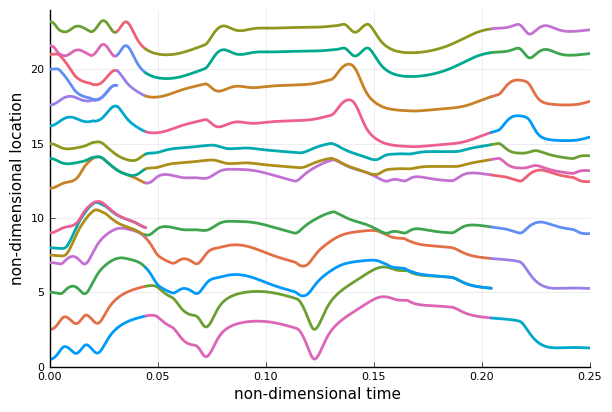

In [32]:
plot(result1.t,result1.Xp[1],label="\$Z_{\\mathrm{p},1}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[2],label="\$Z_{\\mathrm{p},2}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[3],label="\$Z_{\\mathrm{p},3}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[4],label="\$Z_{\\mathrm{p},4}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[5],label="\$Z_{\\mathrm{p},5}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[6],label="\$Z_{\\mathrm{p},6}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[7],label="\$Z_{\\mathrm{p},7}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[8],label="\$Z_{\\mathrm{p},8}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[9],label="\$Z_{\\mathrm{p},9}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[10],label="\$Z_{\\mathrm{p},10}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[11],label="\$Z_{\\mathrm{p},11}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[12],label="\$Z_{\\mathrm{p},12}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[13],label="\$Z_{\\mathrm{p},13}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[14],label="\$Z_{\\mathrm{p},14}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[15],label="\$Z_{\\mathrm{p},15}\$",linewidth=2.0)
plot!(result1.t,result1.Xp[16],label="\$Z_{\\mathrm{p},16}\$",linewidth=2.0)

plot!(result2.t,result2.Xp[1],linewidth=2.0)
plot!(result2.t,result2.Xp[2],linewidth=2.0)
plot!(result2.t,result2.Xp[3],linewidth=2.0)
plot!(result2.t,result2.Xp[4],linewidth=2.0)
plot!(result2.t,result2.Xp[5],linewidth=2.0)
plot!(result2.t,result2.Xp[6],linewidth=2.0)
plot!(result2.t,result2.Xp[7],linewidth=2.0)
plot!(result2.t,result2.Xp[8],linewidth=2.0)
plot!(result2.t,result2.Xp[9],linewidth=2.0)
plot!(result2.t,result2.Xp[10],linewidth=2.0)
plot!(result2.t,result2.Xp[11],linewidth=2.0)
plot!(result2.t,result2.Xp[12],linewidth=2.0)
plot!(result2.t,result2.Xp[13],linewidth=2.0)
plot!(result2.t,result2.Xp[14],linewidth=2.0)

plot!(result3.t,result3.Xp[1],linewidth=2.0)
plot!(result3.t,result3.Xp[2],linewidth=2.0)
plot!(result3.t,result3.Xp[3],linewidth=2.0)
plot!(result3.t,result3.Xp[4],linewidth=2.0)
plot!(result3.t,result3.Xp[5],linewidth=2.0)
plot!(result3.t,result3.Xp[6],linewidth=2.0)
plot!(result3.t,result3.Xp[7],linewidth=2.0)
plot!(result3.t,result3.Xp[8],linewidth=2.0)
plot!(result3.t,result3.Xp[9],linewidth=2.0)
plot!(result3.t,result3.Xp[10],linewidth=2.0)
plot!(result3.t,result3.Xp[11],linewidth=2.0)
plot!(result3.t,result3.Xp[12],linewidth=2.0)
    
plot!(result4.t,result4.Xp[1],linewidth=2.0)
plot!(result4.t,result4.Xp[2],linewidth=2.0)
plot!(result4.t,result4.Xp[3],linewidth=2.0)
plot!(result4.t,result4.Xp[4],linewidth=2.0)
plot!(result4.t,result4.Xp[5],linewidth=2.0)
plot!(result4.t,result4.Xp[6],linewidth=2.0)
plot!(result4.t,result4.Xp[7],linewidth=2.0)
plot!(result4.t,result4.Xp[8],linewidth=2.0)
plot!(result4.t,result4.Xp[9],linewidth=2.0)
plot!(result4.t,result4.Xp[10],linewidth=2.0, xlim=(0.0,0.25),ylim=(0.0,24.0),xlabel="non-dimensional time ",ylabel="non-dimensional location",legend = :none)

savefig("WtubeZ.pdf")

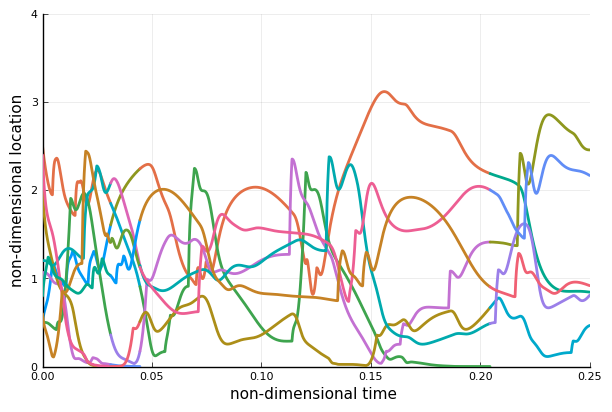

In [28]:
plot(result1.t,result1.M[1],label="\$Z_{\\mathrm{p},1}\$",linewidth=2.0)
plot!(result1.t,result1.M[2],label="\$Z_{\\mathrm{p},2}\$",linewidth=2.0)
plot!(result1.t,result1.M[3],label="\$Z_{\\mathrm{p},3}\$",linewidth=2.0)
plot!(result1.t,result1.M[4],label="\$Z_{\\mathrm{p},4}\$",linewidth=2.0)
plot!(result1.t,result1.M[5],label="\$Z_{\\mathrm{p},5}\$",linewidth=2.0)
plot!(result1.t,result1.M[6],label="\$Z_{\\mathrm{p},6}\$",linewidth=2.0)
plot!(result1.t,result1.M[7],label="\$Z_{\\mathrm{p},7}\$",linewidth=2.0)
plot!(result1.t,result1.M[8],label="\$Z_{\\mathrm{p},8}\$",linewidth=2.0)
plot!(result1.t,result1.M[9],label="\$Z_{\\mathrm{p},9}\$",linewidth=2.0)

plot!(result2.t,result2.M[1],linewidth=2.0)
plot!(result2.t,result2.M[2],linewidth=2.0)
plot!(result2.t,result2.M[3],linewidth=2.0)
plot!(result2.t,result2.M[4],linewidth=2.0)
plot!(result2.t,result2.M[5],linewidth=2.0)
plot!(result2.t,result2.M[6],linewidth=2.0)
plot!(result2.t,result2.M[7],linewidth=2.0)
plot!(result2.t,result2.M[8],linewidth=2.0)

plot!(result3.t,result3.M[1],linewidth=2.0)
plot!(result3.t,result3.M[2],linewidth=2.0)
plot!(result3.t,result3.M[3],linewidth=2.0)
plot!(result3.t,result3.M[4],linewidth=2.0)
plot!(result3.t,result3.M[5],linewidth=2.0)
plot!(result3.t,result3.M[6],linewidth=2.0)
plot!(result3.t,result3.M[7],linewidth=2.0)

    
plot!(result4.t,result4.M[1],linewidth=2.0)
plot!(result4.t,result4.M[2],linewidth=2.0)
plot!(result4.t,result4.M[3],linewidth=2.0)
plot!(result4.t,result4.M[4],linewidth=2.0)
plot!(result4.t,result4.M[5],linewidth=2.0)
plot!(result4.t,result4.M[6],linewidth=2.0, xlim=(0.0,0.25),ylim=(0.0,4.0),xlabel="non-dimensional time ",ylabel="non-dimensional location",legend = :none)

savefig("WtubeM.pdf")